In [93]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [94]:
t = np.arange(0,2.5,1e-5)

def Movement(t):
    
    h = t[1]-t[0]
    G = 4*np.pi**2
    alpha = 1.1e-8
    
    r0 = np.array([0.387098*(1+0.205630),0.])
    v0 = np.array([0.,np.sqrt(G*(1-0.205630) / (0.387098*(1+0.205630)))])
    a0 = -r0* (G/np.linalg.norm(r0)**3) * (1 + alpha/np.linalg.norm(r0)**2)
    
    R = np.zeros( (len(t),len(r0)) )
    V = np.zeros_like(R)
    A = np.zeros_like(R)
    
    R[0] = r0
    V[0] = v0
    A[0] = a0
           
    for i in tqdm(range(0,len(t)-1)):
        R[i+1] = R[i] + V[i]*h + 0.5*A[i]*h**2
        A[i+1] = -R[i+1]*G/np.linalg.norm(R[i+1])**3
        V[i+1] = V[i] + 0.5*h*(A[i]+A[i+1])
    
    return R,A,V
    

In [95]:
R,A,V = Movement(t)

100%|███████████████████████████████████████████████████████████████████████| 249999/249999 [00:12<00:00, 19463.12it/s]


In [96]:
Dist = np.linalg.norm(R,axis=1)
t_ph = []
angulo = []

for i in tqdm(range(1,len(Dist)-1)):
    if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
        t_ph.append(t[i])
        ang = np.arctan2(R[i][1],R[i][0])*(180/np.pi)*(3600/1000)
        angulo.append(np.abs(ang)) # ESTOY CALCULANDO MAL EL ANGULO
        

100%|██████████████████████████████████████████████████████████████████████| 249998/249998 [00:00<00:00, 521225.26it/s]


In [97]:
t_ph,angulo

([0.12042000000000001,
  0.36126,
  0.6021000000000001,
  0.8429500000000001,
  1.08379,
  1.3246300000000002,
  1.5654700000000001,
  1.80631,
  2.0471500000000002,
  2.28799],
 [647.9935720163359,
  647.9807160374062,
  647.9678600584973,
  647.96154207374,
  647.9743980527262,
  647.9872540317967,
  647.999889989099,
  647.9870340100376,
  647.9741780310027,
  647.9613220519709])

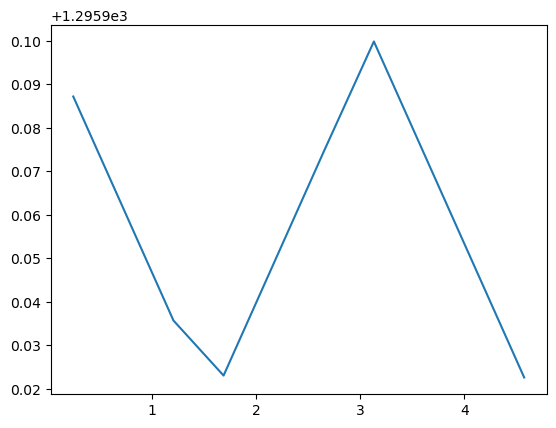

In [98]:
plt.plot(2*np.array(t_ph),2*np.array(angulo))